In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import numpy as np
import pandas as pd

df=pd.read_csv('graph_mining.csv')

# Create a user-item rating matrix where rows correspond to users and columns correspond to restaurants
user_item_rating_matrix = df.pivot_table(index='userID', columns='placeID', values='rating', fill_value=0)

# Convert the user-item rating matrix into a sparse matrix format
sparse_user_item = sparse.csr_matrix(user_item_rating_matrix.values)

# Compute the cosine similarity matrix
cosine_similarity_matrix = cosine_similarity(sparse_user_item)

# Create a DataFrame from the cosine similarity matrix
user_similarity_df = pd.DataFrame(cosine_similarity_matrix, index=user_item_rating_matrix.index, columns=user_item_rating_matrix.index)

# Display the DataFrame of user similarities
user_similarity_df.head()


userID,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
userID,,,,,,,,,,,,,,,,,,,,,
U1001,1.000000,0.227921,0.166957,0.000000,0.059761,0.111456,0.188982,0.0,0.106904,0.000000,...,0.0,0.0,0.0,0.353553,0.0,0.083478,0.0,0.000000,0.148250,0.000000
U1002,0.227921,1.000000,0.266371,0.158362,0.095346,0.088911,0.075378,0.0,0.426401,0.000000,...,0.0,0.0,0.0,0.402911,0.0,0.199778,0.0,0.322329,0.413919,0.355335
U1003,0.166957,0.266371,1.000000,0.000000,0.000000,0.325645,0.000000,0.0,0.374817,0.000000,...,0.0,0.0,0.0,0.118056,0.0,0.439024,0.0,0.059028,0.476463,0.208232
U1004,0.000000,0.158362,0.000000,1.000000,0.166091,0.077440,0.131306,0.0,0.037139,0.000000,...,0.0,0.0,0.0,0.350931,0.0,0.000000,0.0,0.280745,0.103005,0.000000
U1005,0.059761,0.095346,0.000000,0.166091,1.000000,0.000000,0.237171,0.0,0.000000,0.447214,...,0.0,0.0,0.0,0.084515,0.0,0.000000,0.0,0.000000,0.124035,0.000000


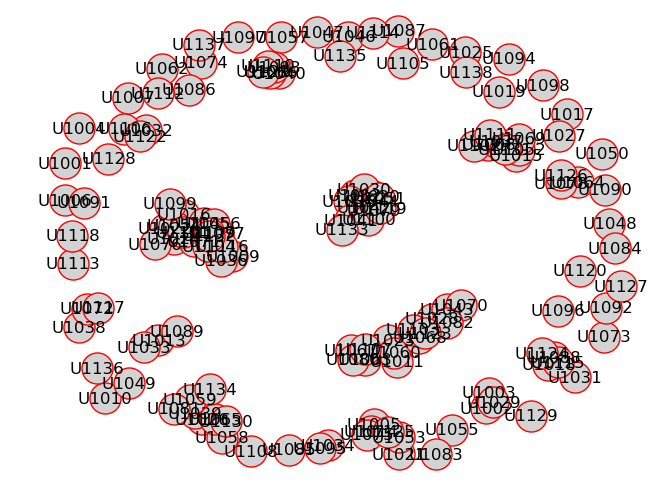

In [7]:
import networkx as nx

# Define a similarity threshold
similarity_threshold = 0.5

# Create a graph from the similarity DataFrame
G = nx.Graph()

# Add nodes
for user_id in user_similarity_df.index:
    G.add_node(user_id)

# Add edges between users with similarity above the threshold
for user1 in user_similarity_df.index:
    for user2 in user_similarity_df.columns:
        if user1 != user2 and user_similarity_df.loc[user1, user2] > similarity_threshold:
            G.add_edge(user1, user2, weight=user_similarity_df.loc[user1, user2])

# Print basic information about the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
connected_components = nx.number_connected_components(G)

(num_nodes, num_edges, connected_components)

nx.draw(G, with_labels=True, node_size=500,edgecolors='red', node_color='lightgray')


In [5]:
# Use the Clauset-Newman-Moore greedy modularity maximization for community detection
communities = nx.algorithms.community.greedy_modularity_communities(G)

# Convert the communities to a dictionary where each key-value pair is user_id-community_id
communities_dict = {user_id: comm_id for comm_id, comm in enumerate(communities) for user_id in comm}

# Create a DataFrame from the communities dictionary
communities_df = pd.DataFrame.from_dict(communities_dict, orient='index', columns=['community'])

# Count the number of communities detected
num_communities = len(communities)

# Display the number of communities and the first few rows of the community DataFrame
(num_communities, communities_df.head())


(65,
        community
 U1063          0
 U1070          0
 U1067          0
 U1123          0
 U1043          0)

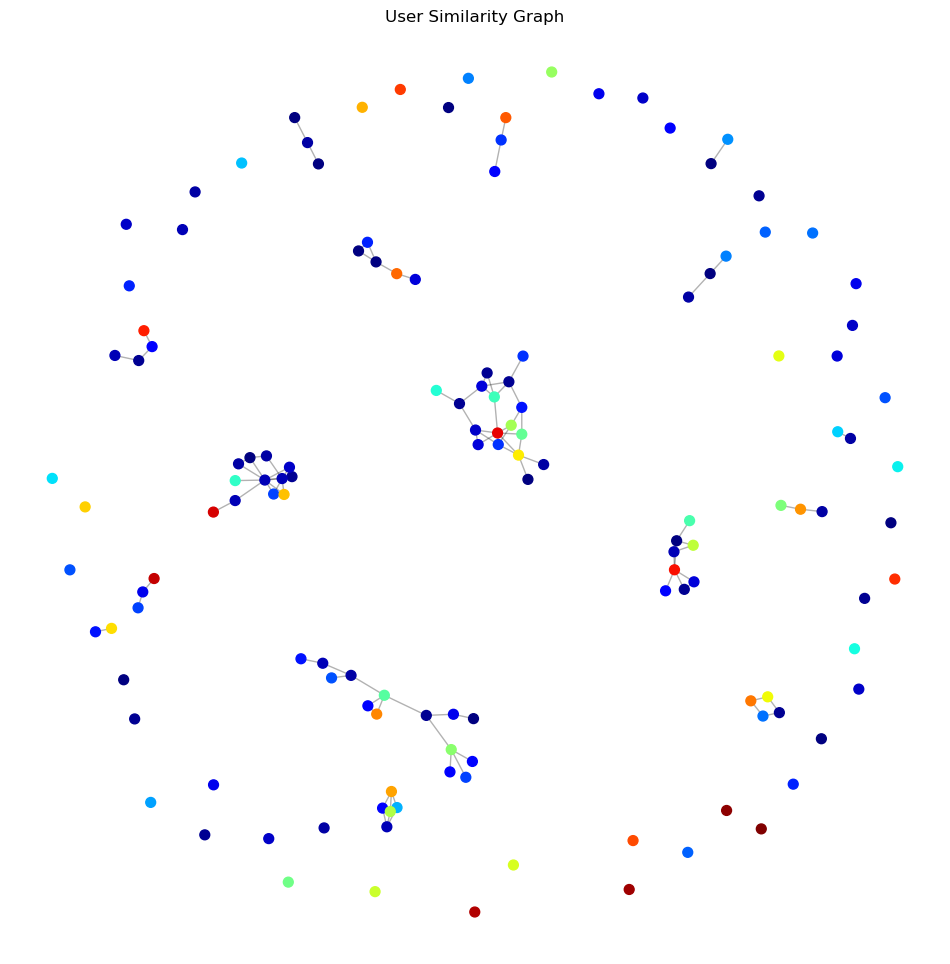

In [6]:
import matplotlib.pyplot as plt

# Since the graph has many nodes and edges, let's create a spring layout to visualize it
pos = nx.spring_layout(G)

# Draw the graph using NetworkX
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.jet, node_color=communities_df['community'].tolist())
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Remove the axis
plt.axis('off')

# Display the graph
plt.title('User Similarity Graph')
plt.show()


Here is a visualization of the user similarity graph. Each dot represents a user, and each line between the dots represents a similarity relationship between users, based on their restaurant ratings. The color of the dots corresponds to different communities of users with similar tastes, as detected by the Clauset-Newman-Moore greedy modularity maximization method.

The graph shows that some users are closely connected (suggesting very similar tastes), while others are not directly connected (suggesting less similarity). The disconnected groups indicate that these users did not have a high enough similarity score with users in other parts of the graph to warrant an edge between them under the chosen threshold. 

/Users/Setty/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


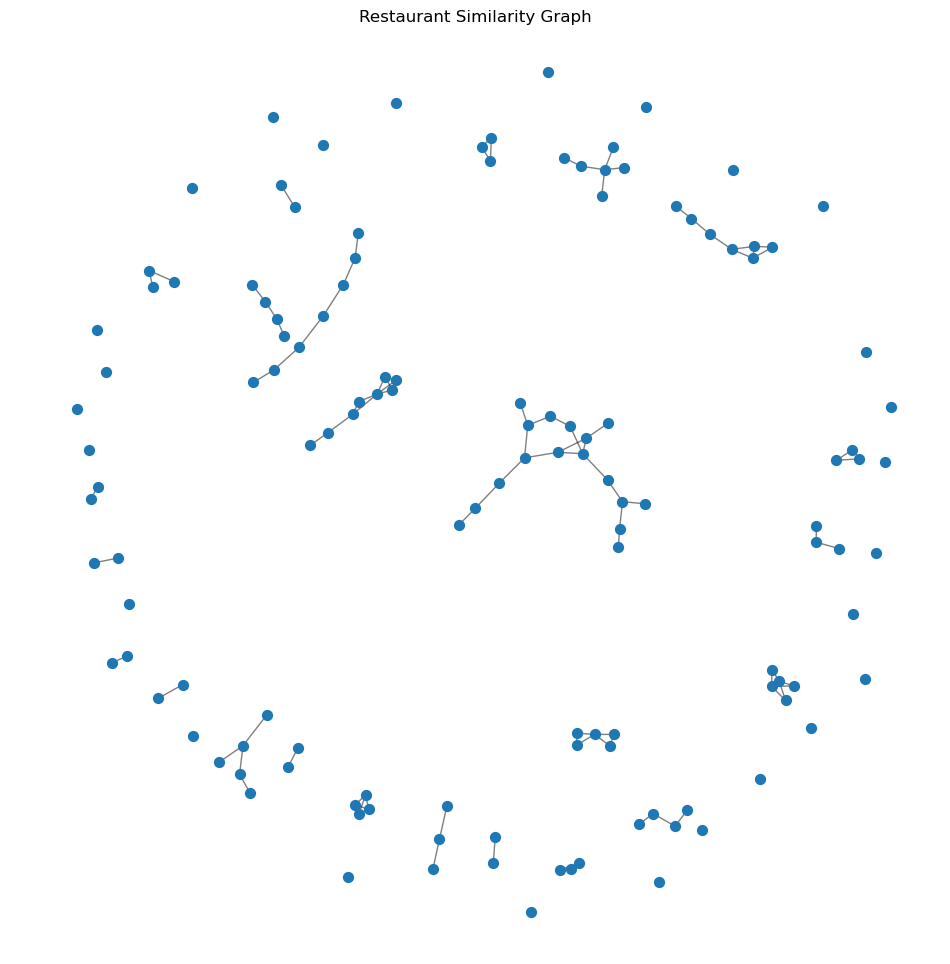

In [11]:
# Since the previous execution context was lost, I will have to re-import the required libraries and redefine variables.
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse



# Create a user-item rating matrix where rows correspond to users and columns correspond to restaurants
user_item_rating_matrix = df.pivot_table(index='userID', columns='placeID', values='rating', fill_value=0)

# Transpose the user-item rating matrix to create an item-item matrix
item_item_rating_matrix = user_item_rating_matrix.T

# Convert the item-item rating matrix into a sparse matrix format
sparse_item_item = sparse.csr_matrix(item_item_rating_matrix.values)

# Compute the cosine similarity matrix for items (restaurants)
cosine_similarity_matrix_items = cosine_similarity(sparse_item_item)

# Create a DataFrame from the cosine similarity matrix for items
item_similarity_df = pd.DataFrame(cosine_similarity_matrix_items, index=item_item_rating_matrix.index, columns=item_item_rating_matrix.index)

# Define a similarity threshold for restaurants
similarity_threshold_items = 0.5

# Create a graph for restaurants
R = nx.Graph()

# Add nodes (restaurants)
for place_id in item_similarity_df.index:
    R.add_node(place_id)

# Add edges between restaurants with similarity above the threshold
for place1 in item_similarity_df.index:
    for place2 in item_similarity_df.columns:
        if place1 != place2 and item_similarity_df.loc[place1, place2] > similarity_threshold_items:
            R.add_edge(place1, place2, weight=item_similarity_df.loc[place1, place2])

# Now visualize the graph of restaurants
pos_restaurants = nx.spring_layout(R, seed=42)

# Draw the graph using NetworkX
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(R, pos_restaurants, node_size=50, cmap=plt.cm.jet)
nx.draw_networkx_edges(R, pos_restaurants, alpha=0.5)

# Remove the axis
plt.axis('off')

# Display the graph
plt.title('Restaurant Similarity Graph')
plt.show()


We constructed a graph where nodes represent restaurants, and edges are weighted by the similarity in the user rating patterns. This could reveal clusters of restaurants that are similarly rated by the users, which can be interpreted as having a similar customer satisfaction profile or perhaps even a similar style or cuisine.

The visualization represents the restaurant similarity graph, where each node is a restaurant and edges connect restaurants that share a high degree of similarity in their user ratings (above the 0.5 threshold). In this graph, restaurants that are closely connected may have similar customer satisfaction profiles, which could be due to similar cuisine, quality, or other factors that influence user ratings.

The graph helps us understand which restaurants are perceived similarly by the users and might form natural clusters, potentially indicating a niche or category in the restaurant market. This can be useful for both customers seeking new dining experiences and restaurant owners looking to understand their positioning in the market.